# Libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

# Red Channel Method

for each pixel, assign red_channel value to green_channel and blue_channel values

In [24]:
def red_channel_method(red, green, blue):
    r = g = b = red
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Green Channel Method

for each pixel, assign green_channel value to red_channel and blue_channel values

In [25]:
def green_channel_method(red, green, blue):
    r = g = b = green
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Blue Channel Method

for each pixel, assign blue_channel value to red_channel and green_channel values

In [26]:
def blue_channel_method(red, green, blue):
    r = g = b = blue
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Maximum of RGB Method

for each pixel, assign maximum value among red_channel, green_channel, and blue_channel value to all three channels

In [27]:
def max_rgb_method(red, green, blue):
    r = g = b = np.maximum(np.maximum(red, green), blue)
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Minimum of RGB Method

for each pixel, assign minimum value among red_channel, green_channel, and blue_channel value to all three channels

In [28]:
def min_rgb_method(red, green, blue):
    r = g = b = np.minimum(np.minimum(red, green), blue)
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Lightness Method

for each pixel, assign average value of minimum value and maximum value among all three channels to all of them

In [29]:
def lightness_method(red, green, blue):
    max_rgb = np.maximum(np.maximum(red, green), blue)
    min_rgb = np.minimum(np.minimum(red, green), blue)
    r = g = b = (max_rgb + min_rgb) // 2
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Average Method

for each pixel, assign average value of all three channels to all of them

In [30]:
def average_method(red, green, blue):
    r = g = b = (red + green + blue) // 3
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Luminosity Method (version 1)

among a, b, and c groups of coefficients, choose one group as weights for RGB channels
for each pixel, assign ((red_channel * r_weight) + (green_channel * g_weight) + (blue_channel * b_weight)) value as all three channel value

In [31]:
def luminosity_method_1(red, green, blue):
    r_weight = 0.30 # a: 0.30 or b: 0.299 or c: 0.2126
    g_weight = 0.59 # a: 0.59 or b: 0.587 or c: 0.7152
    b_weight = 0.11 # a: 0.11 or b: 0.114 or c: 0.0722
    r = g = b = ((red * r_weight) + (green * g_weight) + (blue * b_weight)).astype(int)
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Luminosity Method (version 2)

among a, b, and c groups of coefficients, choose one group as weights for RGB channels
choose a value for gamma for geting rid of banding in smoothly varying dark colors (increasement of gamma value makes photo darker)
for each pixel, assign ((red_channel * r_weight ** gamma) + (green_channel * g_weight ** gamma) + (blue_channel * b_weight ** gamma)) value as all three channel value

In [32]:
def luminosity_method_2(red, green, blue):
    r_weight = 0.3 # 0.3 or 0.299 or 0.2126
    g_weight = 0.59 # 0.59 or 0.587 or 0.7152
    b_weight = 0.11 # 0.11 or 0.114 or 0.0722
    gamma = 1.02
    r = g = b = ((red * r_weight ** gamma) + (green * g_weight ** gamma) + (blue * b_weight ** gamma)).astype(int)
    grayscale_image = cv2.merge([b, g, r])
    return grayscale_image

# Test and Plot

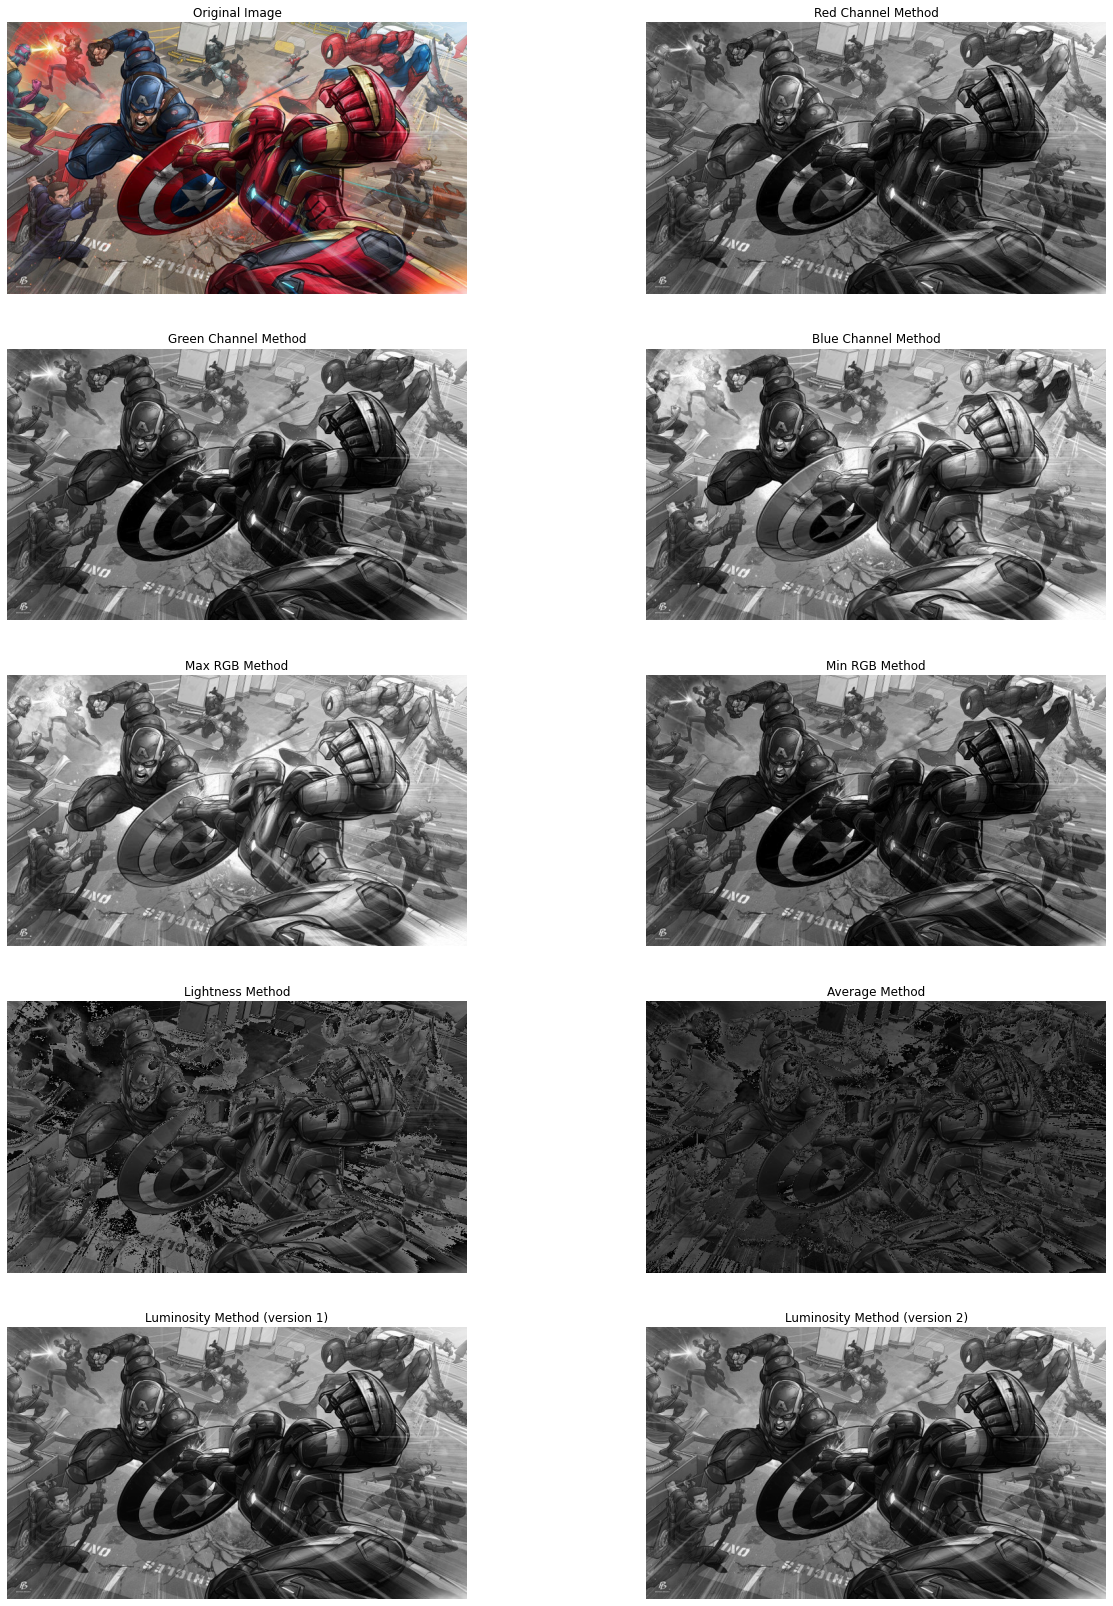

In [33]:
colored_image = img.imread("images/2.jpg")
b_channel, g_channel, r_channel = cv2.split(colored_image)

plt.figure(figsize=(21, 29), facecolor='white')
plt.subplot(5, 2, 1)
plt.imshow(colored_image)
plt.title("Original Image")
plt.axis('off')
plt.subplot(5, 2, 2)
plt.imshow(red_channel_method(r_channel, g_channel, b_channel))
plt.title("Red Channel Method")
plt.axis('off')
plt.subplot(5, 2, 3)
plt.imshow(green_channel_method(r_channel, g_channel, b_channel))
plt.title("Green Channel Method")
plt.axis('off')
plt.subplot(5, 2, 4)
plt.imshow(blue_channel_method(r_channel, g_channel, b_channel))
plt.title("Blue Channel Method")
plt.axis('off')
plt.subplot(5, 2, 5)
plt.imshow(max_rgb_method(r_channel, g_channel, b_channel))
plt.title("Max RGB Method")
plt.axis('off')
plt.subplot(5, 2, 6)
plt.imshow(min_rgb_method(r_channel, g_channel, b_channel))
plt.title("Min RGB Method")
plt.axis('off')
plt.subplot(5, 2, 7)
plt.imshow(lightness_method(r_channel, g_channel, b_channel))
plt.title("Lightness Method")
plt.axis('off')
plt.subplot(5, 2, 8)
plt.imshow(average_method(r_channel, g_channel, b_channel))
plt.title("Average Method")
plt.axis('off')
plt.subplot(5, 2, 9)
plt.imshow(luminosity_method_1(r_channel, g_channel, b_channel))
plt.title("Luminosity Method (version 1)")
plt.axis('off')
plt.subplot(5, 2, 10)
plt.imshow(luminosity_method_2(r_channel, g_channel, b_channel))
plt.title("Luminosity Method (version 2)")
plt.axis('off')
plt.show()
